# Логистическая регрессия
## Цель работы
Познакомиться с широко используемым методом бинарной классификации - логистической регрессией.

## Содержание работы
1. Сгенерировать матрицу признаков и вектор целей для задачи классификации с использованием make_classification из библиотеки sklearn.datasets. Число классов возьмите равным двум.
2. Реализовать модель логистической регрессии методом градиентного спуска, не используя библиотечные функции.
3. Оценить качество построенной модели, используя метрики accuracy и F1-score.
4. Реализовать модель логистической регрессии LogisticRegression из библиотеки sklearn.linear_model и оценить качество построенной модели, используя метрики accuracy и F1-score.
5. Сравнить результаты двух реализаций.

### 1. Сгенерировать матрицу признаков и вектор целей для задачи классификации с использованием make_classification из библиотеки sklearn.datasets. Число классов возьмите равным двум.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [3]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


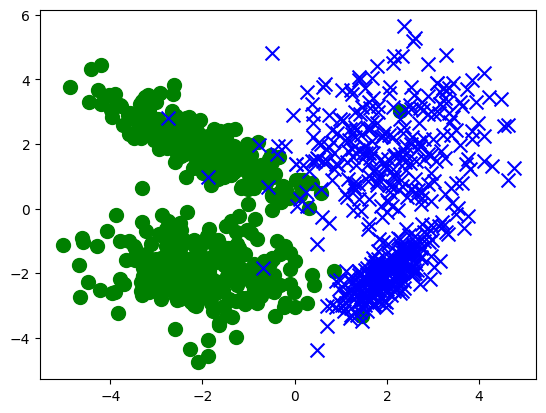

In [4]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='g', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

### 2. Реализовать модель логистической регрессии методом градиентного спуска, не используя библиотечные функции.

In [5]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X): # функция предсказания значения сигмоиды - вероятность отнесения данного объекта к полоительному классу
        return self.sigmoid(X, self.b)
    
    def predict(self, X): # точное предсказание
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [6]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

logreg.fit(X, y)
y_pred = logreg.predict(X)

### 3. Оценить качество построенной модели, используя метрики accuracy и F1-score.

In [7]:
from sklearn.metrics import accuracy_score, f1_score

In [8]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [9]:
y_pred_proba = logreg.predict_proba(X)

In [10]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [11]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

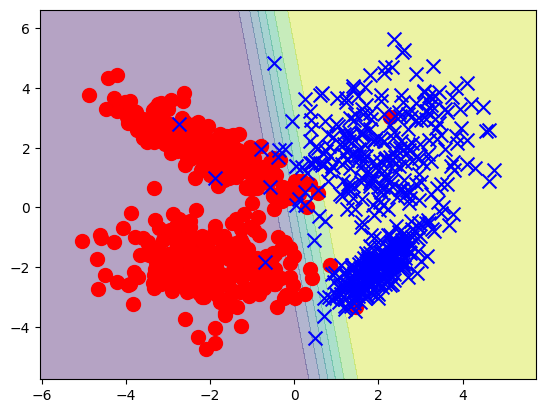

In [12]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

### 4. Реализовать модель логистической регрессии LogisticRegression из библиотеки sklearn.linear_model и оценить качество построенной модели, используя метрики accuracy и F1-score.

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model_lr = LogisticRegression()

In [15]:
model_lr.fit(X, y)
y_pred_lr = model_lr.predict(X)

## Задания для самостоятельного выполнения


### 1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [16]:
ac_lr = accuracy_score(y, y_pred_lr)
f1_lr = f1_score(y, y_pred_lr)
print(f'accuracy = {ac_lr:.2f} F1-score = {f1_lr:.2f}')

accuracy = 0.98 F1-score = 0.98


In [17]:
Z_lr = model_lr.predict_proba(XX)[:, 1]  
Z_lr = Z_lr.reshape(xx.shape)  

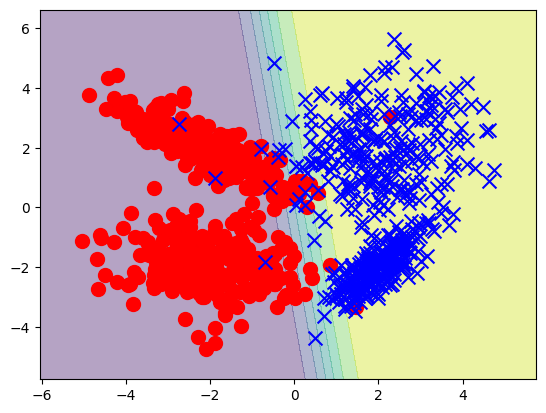

In [18]:
plt.contourf(xx, yy, Z_lr, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [19]:
alpha_values = [0.01, 0.1, 0.5, 1, 2, 3, 50, 93]  
for alpha in alpha_values:
    model = LogReg(alpha=alpha)
    try:
        model.fit(X, y)   
        print(f"Модель обучена с alpha={alpha}")
    except Exception as e:
        print(f"Ошибка при обучении с alpha={alpha}: {e}")


Модель обучена с alpha=0.01
Модель обучена с alpha=0.1
Модель обучена с alpha=0.5
Модель обучена с alpha=1
Модель обучена с alpha=2
Модель обучена с alpha=3
Модель обучена с alpha=50
Модель обучена с alpha=93


C:\Users\Polyak\AppData\Local\Temp\ipykernel_10232\1294767628.py:24: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


### 3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [20]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for _ in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y):
        X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        m = X_with_bias.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

### 4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

0.8037914691943128


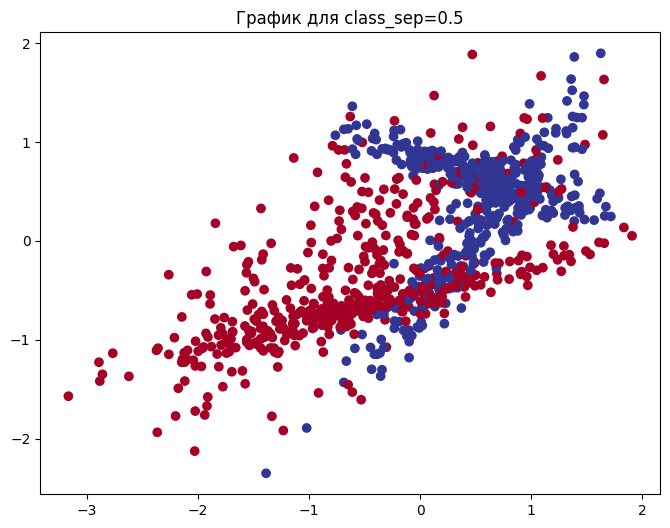

0.8778004073319755


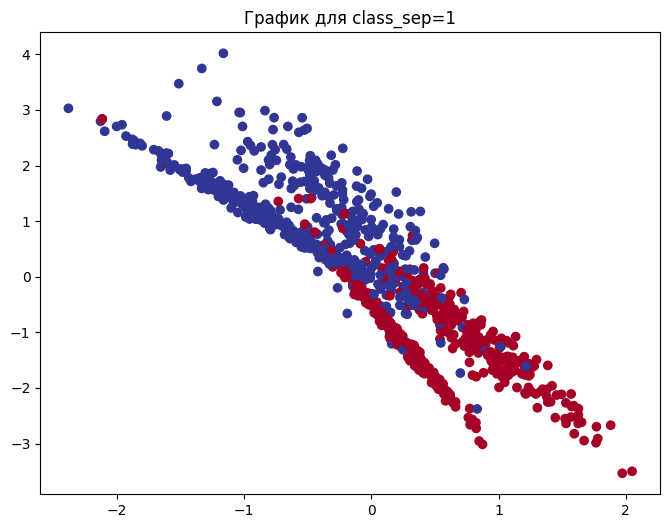

0.9839357429718876


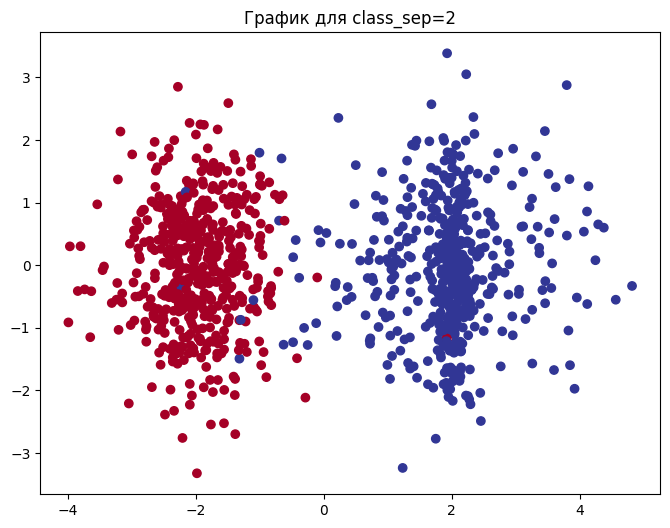

0.995004995004995


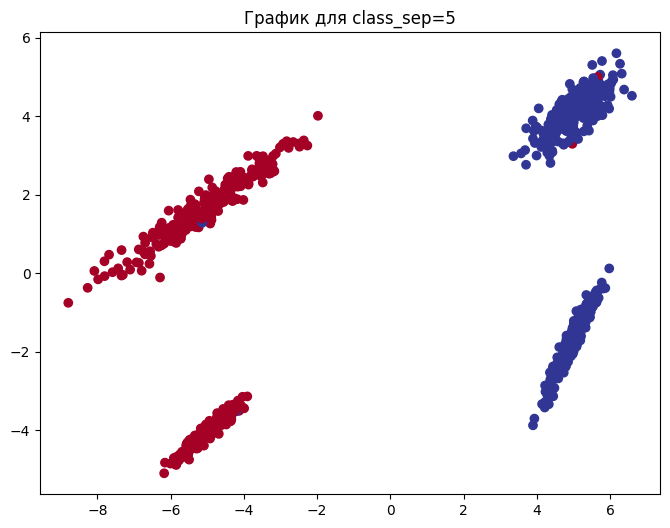

In [21]:
class_sep_values = [0.5, 1, 2, 5]
for class_sep in class_sep_values:
    X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_classes=2, class_sep=class_sep)
    
    model = LogReg(alpha=0.1)
    model.fit(X, y)

    print(f1_score(y, model.predict(X)))
    
    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.title(f'График для class_sep={class_sep}')
    plt.show()

Классы становятся более разделимы, что повышает точность модели

### 5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [22]:
X, y = make_classification(n_samples=1000, n_features=100, n_informative=50, n_classes=2)
model = LogReg(alpha=0.1)
model.fit(X, y)


In [23]:
f1_score(y, model.predict(X))

0.8630541871921182

### 6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [24]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=4, n_classes=3, random_state=42)

model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X, y)

c:\Users\Polyak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [25]:
y_pred = model_ova.predict(X)
y_proba = model_ova.predict_proba(X)  

In [26]:
print("Предсказанные вероятности для первых 5 объектов:")
print(y_proba[:5])

Предсказанные вероятности для первых 5 объектов:
[[0.63531564 0.16295245 0.2017319 ]
 [0.19960072 0.49920255 0.30119673]
 [0.0518592  0.34797938 0.60016142]
 [0.30216656 0.10689178 0.59094166]
 [0.14310118 0.63259989 0.22429893]]


### 7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [27]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

LogisticRegression(max_iter=1000)

In [28]:
clf.predict_proba(X)

array([[0.64046978, 0.14456958, 0.21496064],
       [0.17442462, 0.47928886, 0.34628653],
       [0.0553797 , 0.33170698, 0.61291332],
       ...,
       [0.02206334, 0.88219714, 0.09573952],
       [0.03791306, 0.74605846, 0.21602848],
       [0.70698491, 0.00905079, 0.28396429]], shape=(1000, 3))